## FOUNDATIONAL PROJECT 1

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')

from keras.optimizers import Adam
import statistics
import seaborn as sns
from datetime import datetime, date
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor,LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [2]:
df_news = pd.read_csv("https://raw.githubusercontent.com/gitsim02/FoundationProject-1/main/Reliance_sentiment.csv")
df_news.head()

,date,title_senti_comp,news_senti_comp,avg_senti_comp
0,2016-08-01,0.0000,0.6369,0.320
1,2016-08-05,0.0000,0.7829,0.390
2,2016-08-18,0.0000,0.8402,0.420
3,2016-08-19,-0.4588,-0.7239,-0.590
4,2016-08-30,0.0000,0.8824,0.445


In [3]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              654 non-null    object 
 1   title_senti_comp  654 non-null    float64
 2   news_senti_comp   654 non-null    float64
 3   avg_senti_comp    654 non-null    float64
dtypes: float64(3), object(1)
memory usage: 20.6+ KB


In [4]:
df_price = pd.read_csv("https://raw.githubusercontent.com/gitsim02/FoundationProject-1/main/reliance_prices.csv")
df_price.head()

,Date,Open,High,Low,Close,Adj Close,Volume,1d_diff,5d_diff,10d_diff,...,SMA5,SMA9,SMA15,SMA30,EMA3,EMA5,EMA9,EMA15,EMA30,Volume_100k
0,2016-12-13,509.173553,515.612488,508.950653,515.018127,501.832367,4783826,-9.757507,-8.965027,-12.333130,...,506.711877,501.177117,497.654399,497.400968,510.925976,507.810375,503.683619,500.984710,501.394308,47.838
1,2016-12-14,515.018127,527.227417,514.225647,524.775635,511.339996,11140265,3.244202,-1.857422,4.853943,...,512.690204,504.575460,499.321924,497.541305,517.850805,513.465462,507.902022,503.958576,502.902781,111.403
2,2016-12-15,521.258972,528.787598,519.401611,521.531433,508.178925,8921708,-2.080261,-0.198120,-6.191284,...,515.949316,507.778436,501.488059,498.023402,519.691119,516.154119,510.627905,506.155183,504.104629,89.217
3,2016-12-16,521.060852,526.013916,521.060852,523.611694,510.205872,6895825,-2.674622,-0.074280,-12.506470,...,518.742841,511.262082,503.583201,498.571539,521.651407,518.639977,513.224663,508.337247,505.363150,68.958
4,2016-12-19,522.546753,528.465698,522.224854,526.286316,512.812012,6926943,2.303162,7.479065,-11.169128,...,522.244641,514.418274,506.089443,499.512618,523.968861,521.188757,515.836993,510.580880,506.713031,69.269


In [5]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384 entries, 0 to 1383
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         1384 non-null   object 
 1   Open         1384 non-null   float64
 2   High         1384 non-null   float64
 3   Low          1384 non-null   float64
 4   Close        1384 non-null   float64
 5   Adj Close    1384 non-null   float64
 6   Volume       1384 non-null   int64  
 7   1d_diff      1384 non-null   float64
 8   5d_diff      1384 non-null   float64
 9   10d_diff     1384 non-null   float64
 10  SMA3         1384 non-null   float64
 11  SMA5         1384 non-null   float64
 12  SMA9         1384 non-null   float64
 13  SMA15        1384 non-null   float64
 14  SMA30        1384 non-null   float64
 15  EMA3         1384 non-null   float64
 16  EMA5         1384 non-null   float64
 17  EMA9         1384 non-null   float64
 18  EMA15        1384 non-null   float64
 19  EMA30 

In [6]:
# Converting Dates to datetime

df_news['date'] = pd.to_datetime(df_news.date)
df_price['Date'] = pd.to_datetime(df_price.Date)

In [7]:
# Combining both datasets

df_combined = pd.merge(left=df_price,right=df_news,how="left",left_on = 'Date',right_on='date')

df_combined.drop(['date'],axis=1,inplace=True)

df_combined.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,1d_diff,5d_diff,10d_diff,...,SMA30,EMA3,EMA5,EMA9,EMA15,EMA30,Volume_100k,title_senti_comp,news_senti_comp,avg_senti_comp
1379,2022-07-11,2376.500000,2428.800049,2370.000000,2423.899902,2423.899902,6390604,3.449951,1.649902,3.500000,...,2574.979997,2411.709763,2417.687410,2439.967735,2472.975022,2523.815943,63.906,NaN,NaN,NaN
1380,2022-07-12,2404.000000,2439.699951,2404.000000,2420.449951,2420.449951,4974502,42.899902,-16.650146,-1.050049,...,2567.906665,2416.079857,2418.608257,2436.064178,2466.409388,2517.147169,49.745,NaN,NaN,NaN
1381,2022-07-13,2427.300049,2434.000000,2373.000000,2377.550049,2377.550049,6564435,-19.599854,-125.449951,-41.649902,...,2559.375000,2396.814953,2404.922187,2424.361352,2455.301971,2508.140903,65.644,0.0,-0.0772,-0.04
1382,2022-07-14,2388.000000,2433.949951,2376.949951,2397.149902,2397.149902,7831798,-4.650146,-89.150146,-59.950195,...,2548.469995,2396.982428,2402.331426,2418.919062,2448.032962,2500.980193,78.318,0.0,0.4703,0.24
1383,2022-07-15,2415.000000,2415.000000,2383.100098,2401.800049,2401.800049,4431880,-20.449951,-101.300049,-107.649902,...,2535.879997,2399.391238,2402.154300,2415.495260,2442.253848,2494.581474,44.319,NaN,NaN,NaN


In [8]:
df_combined.isna().sum()

Date                  0
Open                  0
High                  0
Low                   0
Close                 0
Adj Close             0
Volume                0
1d_diff               0
5d_diff               0
10d_diff              0
SMA3                  0
SMA5                  0
SMA9                  0
SMA15                 0
SMA30                 0
EMA3                  0
EMA5                  0
EMA9                  0
EMA15                 0
EMA30                 0
Volume_100k           0
title_senti_comp    846
news_senti_comp     846
avg_senti_comp      846
dtype: int64

In [9]:
# Impute all the NaN with 0 as the sentiment score.

df_combined.fillna(0.0,inplace=True)

df_combined.isna().sum()

Date                0
Open                0
High                0
Low                 0
Close               0
Adj Close           0
Volume              0
1d_diff             0
5d_diff             0
10d_diff            0
SMA3                0
SMA5                0
SMA9                0
SMA15               0
SMA30               0
EMA3                0
EMA5                0
EMA9                0
EMA15               0
EMA30               0
Volume_100k         0
title_senti_comp    0
news_senti_comp     0
avg_senti_comp      0
dtype: int64

## Time Series Forecasting



In [10]:
# convert it to the datetime64[ns] data type

df_combined['Date'] = pd.to_datetime(df_combined.Date)

df_combined.Date.min(),df_combined.Date.max()

(Timestamp('2016-12-13 00:00:00'), Timestamp('2022-07-15 00:00:00'))

In [11]:
df_combined.Date.max()-df_combined.Date.min()

Timedelta('2040 days 00:00:00')

In [12]:
df_combined.set_index('Date',inplace=True)

df_combined.head()

,Open,High,Low,Close,Adj Close,Volume,1d_diff,5d_diff,10d_diff,SMA3,...,SMA30,EMA3,EMA5,EMA9,EMA15,EMA30,Volume_100k,title_senti_comp,news_senti_comp,avg_senti_comp
Date,,,,,,,,,,,,,,,,,,,,,
2016-12-13,509.173553,515.612488,508.950653,515.018127,501.832367,4783826,-9.757507,-8.965027,-12.333130,511.146505,...,497.400968,510.925976,507.810375,503.683619,500.984710,501.394308,47.838,0.0,0.000000,0.000000
2016-12-14,515.018127,527.227417,514.225647,524.775635,511.339996,11140265,3.244202,-1.857422,4.853943,516.190358,...,497.541305,517.850805,513.465462,507.902022,503.958576,502.902781,111.403,0.0,0.730367,0.366667
2016-12-15,521.258972,528.787598,519.401611,521.531433,508.178925,8921708,-2.080261,-0.198120,-6.191284,520.441732,...,498.023402,519.691119,516.154119,510.627905,506.155183,504.104629,89.217,0.0,0.000000,0.000000
2016-12-16,521.060852,526.013916,521.060852,523.611694,510.205872,6895825,-2.674622,-0.074280,-12.506470,523.306254,...,498.571539,521.651407,518.639977,513.224663,508.337247,505.363150,68.958,0.0,0.000000,0.000000
2016-12-19,522.546753,528.465698,522.224854,526.286316,512.812012,6926943,2.303162,7.479065,-11.169128,523.809814,...,499.512618,523.968861,521.188757,515.836993,510.580880,506.713031,69.269,0.0,0.000000,0.000000


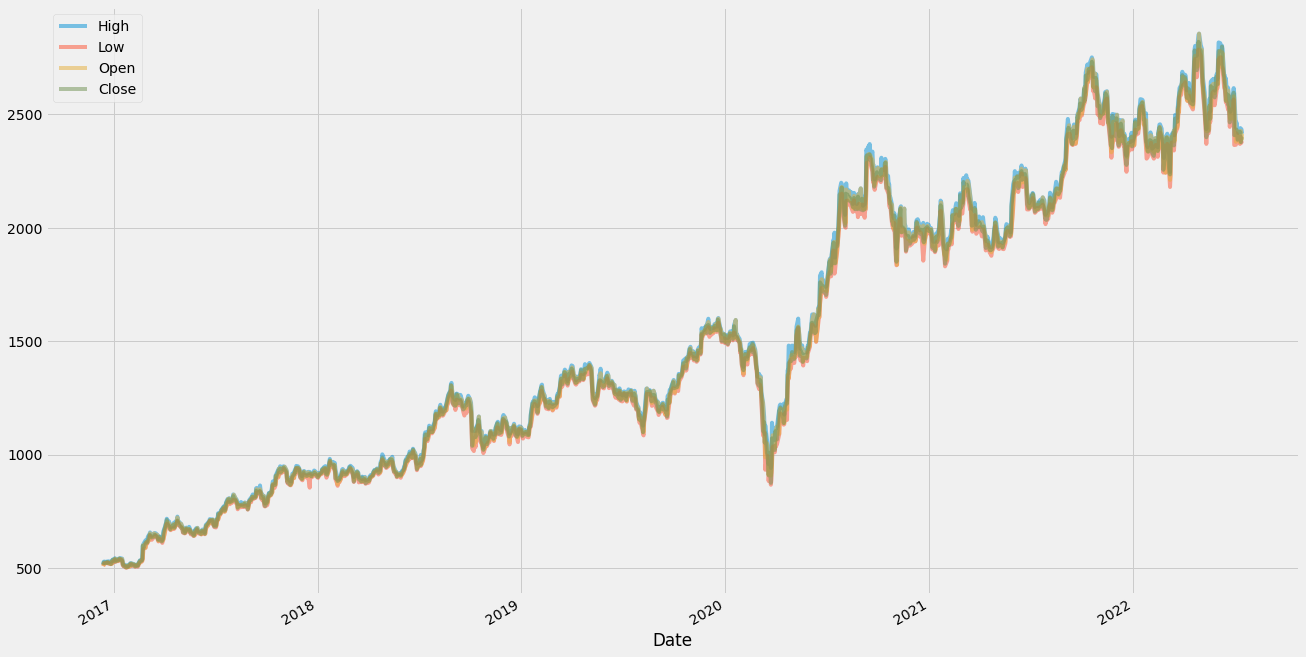

In [13]:
df_combined[['High','Low','Open','Close']].plot(figsize = (20, 12), alpha = 0.5);

The four had almost same behaviour throughout time.
Based on this assumption in this project, we will only focus on one of them 'High' in order to build a model which could predict future values.

Firstly, we will demonstrate if the time-series problem corresponds to a Non-Stationary type, which characterizes for having:

- Non-constant variance
- Non-constant mean
- Seasonality
- High autocorrelation

There are four well known ways to evaluate if the series meets the criteria just mentioned, these corresponds to:

- Sequence visualization.
- Histogram, Autocorrelation and Partial Aurocorrelation plots
- Statistical summary of chunks
- Adfuller test

## Evaluating Stationarity:

The following histogram plot should have a uniform distribution meaning non-constant mean or 'trend':

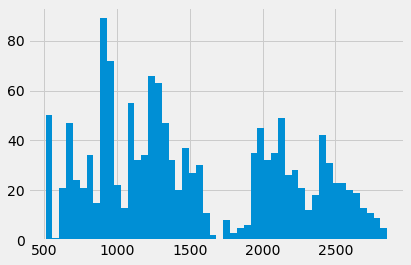

In [14]:
df_combined.High.hist(bins=50);

We can't assume a uniform nor normal distribution in the plot above, because of that the statistical summary can helps us more, for this we will split the data into 10 chunks and compute mean and variance of each one.

In [15]:
np.round(df_combined.shape[0]/10,0)

138.0

In [16]:
from statistics import stdev
mean=[]
std=[]
    
for i in range(0,10):
    mean.append(df_combined['High'].iloc[(i*138):(i*138)+138].mean())
    std.append(stdev(df_combined['High'].iloc[(i*138):(i*138)+138]))

pd.concat([pd.DataFrame(mean,columns=['mean']),pd.DataFrame(std,columns=['std'])], axis=1)

,mean,std
0,618.141721,73.354977
1,860.117596,67.454233
2,973.668423,76.949434
3,1174.754717,72.281221
4,1292.551884,60.744464
5,1406.788601,162.102458
6,1943.824037,295.129467
7,2023.334413,77.385269
8,2360.411586,200.246806
9,2539.944557,142.108727


Above we see how both measures are clearly different in each chunk. However looking at the plot we could assume a constant variance as the ripple in the curve, but without a doubt trend is the most outstanding feature.

Until now can assume it's a non-stationary series. But to know more about it we will evaluate two other methods.


Seasonal decomposition is a function from statsmodels library which allows us to decompose the series into trend, seasonal and residual, either additive or multiplicative

Looking carefully to the original curve we can say the additive decomposition makes more sense as the trend does not seem to be changing by the multiplication with seasonal component

Rather every component seems to being added up to create the original curve.

Independent of this there is a trend and seasonal component.

Below we can see the ACF and PACF plots:

In [17]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

Finally, we will make the Augmented Dickey-Fuller test, using 5% as significance level and declaring the following hypothesis:

- H0= Series corresponds to non-stationary type.
- H1= Series corresponds to stationary type.

In [18]:
from statsmodels.tsa.stattools import adfuller

In [19]:
result = adfuller(df_combined['High'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.033713
p-value: 0.740771
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


As p-value is greater than 0.05 we fail to reject the null hypothesis, therefore there is not enough evidence to reject that we are working with a non-stationary series. Let's apply the log transformation to the series and test again.

In [20]:
from numpy import log
result = adfuller(log(df_combined['High']))
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.769665
p-value: 0.395623
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


Based on every method applied we can endorse the serie clearly corresponds to a non-stationary type, which means that we have to convert this to stationary by using filters and complex transformations.

However, deep learning approaches can lead us to build models which takes into account all of these characteristics and predict future values modestly, but as disadvantage it would take significantly more time to train such models.

## Modeling:

Firstly, we will define a new dataset equal to the existing one, but omitting the last 50 records, later we will use the model to predict such values.

In [21]:
new_df = df_combined['Close'].iloc[:-50]
new_df.tail()

Date
2022-04-29    2790.250000
2022-05-02    2780.449951
2022-05-04    2693.649902
2022-05-05    2640.899902
2022-05-06    2620.649902
Name: Close, dtype: float64

We define the length of the training set as 80% of the total records 

In [22]:
#!pip install python-math
import math
train_len = math.ceil(len(new_df)*0.8)
train_len

1068

Let's use 10 as a random window to be used in the model to build:

In [23]:
window=10

The following lines create the training sets, as we now the first row takes the first 10 time steps and then the second row takes time steps shifted in one and so on and so forth:

In [24]:
train_data = new_df[0:train_len]

X_train=[]
Y_train=[]

for i in range(window, len(train_data)):
    X_train.append(train_data[i-window:i])
    Y_train.append(train_data[i])

In [25]:
X_train, Y_train= np.array(X_train), np.array(Y_train)

Reshaping the training set to (number of records-window, number of time steps, 1):

In [26]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1058, 10, 1)

In [27]:
X_train[0]

array([[515.01812744],
       [524.77563477],
       [521.53143311],
       [523.61169434],
       [526.28631592],
       [523.9831543 ],
       [526.63305664],
       [521.72955322],
       [523.68597412],
       [518.80725098]])

The following is the first model to be used, this is relatively simple with one LSTM layer with relu activation function and one hidden fully connected layer, the optimizer used is Adam, number of epochs=10, batch_size=10 and loss function=Mean squared error:

In [28]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [29]:
model=Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1],1)))
model.add(Dense(25))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()
model.fit(X_train, Y_train, epochs=10, batch_size=10, verbose=0);

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 11,701
Trainable params: 11,701
Non-trainable params: 0
_________________________________________________________________


Creating the validation set using same logic as training:

In [30]:
test_data = new_df[train_len-window:]

X_val=[]
Y_val=[] 

for i in range(window, len(test_data)):
    X_val.append(test_data[i-window:i])
    Y_val.append(test_data[i])

In [31]:
X_val, Y_val = np.array(X_val), np.array(Y_val)
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1],1))

In [32]:
X_val.shape, Y_val.shape

((266, 10, 1), (266,))

In [33]:
X_val[0]

array([[2047.30004883],
       [1991.44995117],
       [1994.65002441],
       [2029.30004883],
       [2003.09997559],
       [2021.84997559],
       [1992.59997559],
       [1984.30004883],
       [2002.84997559],
       [2005.34997559]])

Now that our validation set has the correct shape we can use it in the model to predict the next value.

In [34]:
prediction = model.predict(X_val)

len(prediction), len(Y_val)

9/9 [==============================] - 1s 4ms/step


(266, 266)

As our prediction and actual values have the same shape we can use these sets to compute the error metrics, in this case we will use RMSE.

In [35]:
from sklearn.metrics import mean_squared_error

lstm_train_pred = model.predict(X_train)
lstm_valid_pred = model.predict(X_val)
rmse_v1 = np.sqrt(mean_squared_error(Y_train, lstm_train_pred))
print('Train rmse:', rmse_v1)
print('Validation rmse:', np.sqrt(mean_squared_error(Y_val, lstm_valid_pred)))

9/9 [==============================] - 0s 4ms/step
Train rmse: 33.55989606200709
Validation rmse: 51.858964343623505


In [72]:
from sklearn.metrics import r2_score

coefficient_of_dermination = r2_score(Y_train, lstm_train_pred)
coefficient_of_dermination

0.9947402069106916

Both errors are high, if we specifically see the validation one we could say it's too much and we aim to improve this as we build a robust model in the next steps.

Below is a table which merged the actual and predicted values, therefore we can see for each record how differ these two and have an idea of how sidetracked we currently are.

In [36]:
valid = pd.DataFrame(new_df[train_len:])
valid['Predictions']=lstm_valid_pred
valid

,Close,Predictions
Date,,
2021-04-09,1982.050049,1997.647949
2021-04-12,1911.150024,1995.847900
2021-04-13,1931.800049,1942.678833
2021-04-15,1944.300049,1919.211670
2021-04-16,1932.099976,1918.387451
...,...,...
2022-04-29,2790.250000,2751.755127
2022-05-02,2780.449951,2761.979492
2022-05-04,2693.649902,2773.802490


## Creating residual
#### regressing that with news 

In [37]:
lstm_pred_sentiment = valid.join(other=df_combined[['title_senti_comp','news_senti_comp','avg_senti_comp']],
                                 on='Date',how='left',)

lstm_pred_sentiment.index.min(),lstm_pred_sentiment.index.max()

(Timestamp('2021-04-09 00:00:00'), Timestamp('2022-05-06 00:00:00'))

In [75]:
lstm_pred_sentiment.index.max()-lstm_pred_sentiment.index.min()

Timedelta('392 days 00:00:00')

In [38]:
## only 118 rows where sentiment is not 0
lstm_pred_sentiment[lstm_pred_sentiment['avg_senti_comp']>0].shape[0]

118

In [39]:
## calculate residulal
lstm_pred_sentiment['residual'] =  lstm_pred_sentiment['Predictions'] - lstm_pred_sentiment['Close']

In [40]:
# regress sentiment score using OLS on residual
from statsmodels.formula.api import ols

In [41]:
lm = ols(formula="residual ~ news_senti_comp",data=lstm_pred_sentiment).fit()

In [42]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               residual   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.4482
Date:                Sat, 13 Aug 2022   Prob (F-statistic):              0.504
Time:                        12:33:14   Log-Likelihood:                -1406.6
No. Observations:                 266   AIC:                             2817.
Df Residuals:                     264   BIC:                             2824.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -18.2791      3.720     -4.913      0.000     -25.604     -10.954
news_senti_comp    -5.1248      7.655     -0.669      0.504     -20.198       9.948
==============================================================================
Omnibus:                        2.727   Durbin-Watson:                   0.934
Prob(Omnibus):                  0.256   Jarque-Bera (JB):                2.885
Skew:                           0.035   Prob(JB):                        0.236
Kurtosis:                       3.505   Cond. No.                         2.86
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
# prediction = close + residual
# residual   = 6.745 - 14.88*news_sentiment + epsilon
# prediction = close + 6.475 - 14.88*news_sentiment

In [44]:
lstm_pred_sentiment['ols_adjusted_pred']=lstm_pred_sentiment['Close']+ 6.475- 14.88*lstm_pred_sentiment['news_senti_comp']

In [71]:
rmse_v2 = np.sqrt(mean_squared_error(lstm_pred_sentiment.Close, lstm_pred_sentiment.ols_adjusted_pred))
print('OLS Modified RMSE:', rmse_v2)

OLS Modified RMSE: 6.089265816961139


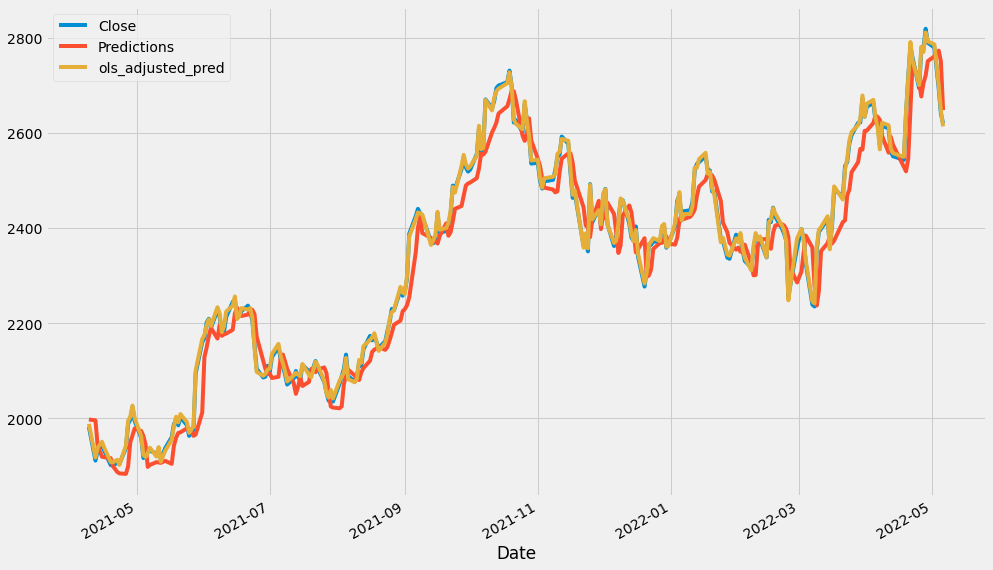

In [45]:
lstm_pred_sentiment[['Close','Predictions','ols_adjusted_pred']].plot(kind='line',figsize=(15,10));

In [46]:
model.predict(([[2632,2632,2632,2632,2632,2632,2632,2632,2632,2632]]))

1/1 [==============================] - 0s 475ms/step


array([[2634.1672]], dtype=float32)

In [47]:
from keras.models import load_model

model.save('lstm_model')  # creates a HDF5 file 'my_model.h5'
del model  # deletes the existing model

# It can be used to reconstruct the model identically.
reconstructed_model = load_model("lstm_model")

# returns a compiled model
# identical to the previous one
# model = load_model('my_model.h5')

INFO:tensorflow:Assets written to: lstm_model\assets


In [ ]:
reconstructed_model

In [ ]:
reconstructed_model.predict([[2632,2632,2632,2632,2632,2632,2632,2632,2632,2632]])

In [ ]:
import yfinance as yf

In [ ]:
def get_stock_data(stock,startdate,enddate,interval):
        ticker = stock  
        yf.pdr_override()
        df = yf.download(tickers=stock, start=startdate, end=enddate, interval=interval)
        df.reset_index(inplace=True) 
        df['Date'] = df['Date'].dt.date
      
        return df

In [ ]:
import yfinance as yf
GetRILInformation = yf.Ticker("Reliance.NS")
from datetime import date, timedelta

stock = 'Reliance.NS'
interval = '1d'
today = date.today()
yesterday = today - timedelta(20)


In [ ]:
stock_data = get_stock_data(stock,yesterday,today,interval)
last10prices = stock_data[['Date','Close']].head(10)   
last10prices

In [ ]:
reconstructed_model.predict([last10prices.Close.tolist()])

In [ ]:
#my_model = './model.h5'
my_model = load_model('my_model.h5')

In [ ]:
my_model.predict([last10prices.Close.tolist()])

## Business Success Criteria

In [48]:
lstm_pred_sentiment.head()

,Close,Predictions,title_senti_comp,news_senti_comp,avg_senti_comp,residual,ols_adjusted_pred
Date,,,,,,,
2021-04-09,1982.050049,1997.647949,0.0,0.0,0.0,15.597900,1988.525049
2021-04-12,1911.150024,1995.847900,0.0,0.0,0.0,84.697876,1917.625024
2021-04-13,1931.800049,1942.678833,0.0,0.0,0.0,10.878784,1938.275049
2021-04-15,1944.300049,1919.211670,0.0,0.0,0.0,-25.088379,1950.775049
2021-04-16,1932.099976,1918.387451,0.0,0.0,0.0,-13.712524,1938.574976


Let's say user wants to invest Rs.1,00,000 across a duration of 1 month.  
Using our model, the user may get a return of 12% to 14% CAGR

In [60]:
lstm_pred_sentiment['recommendation'] = np.where(lstm_pred_sentiment['ols_adjusted_pred']>
                                                 1.0032*lstm_pred_sentiment['Close'],
                                                'Buy','Hold')
lstm_pred_sentiment['recommendation'].value_counts()

Hold    241
Buy      25
Name: recommendation, dtype: int64

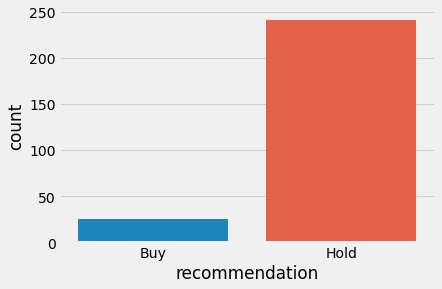

In [74]:
sns.countplot(data = lstm_pred_sentiment, x='recommendation')
plt.title("");

In [61]:
lstm_pred_sentiment['Buy'] = np.where(lstm_pred_sentiment['recommendation']=='Buy',1,0)
lstm_pred_sentiment['Purchased'] = lstm_pred_sentiment['Buy']*lstm_pred_sentiment['Close']

In [62]:
sum(lstm_pred_sentiment['Purchased'])

50590.35046386719

In [63]:
sum(lstm_pred_sentiment['Buy'])

25

In [68]:
lstm_pred_sentiment.tail(1)['Close'], lstm_pred_sentiment.tail(1)['Close']*25

(Date
 2022-05-06    2620.649902
 Name: Close, dtype: float64,
 Date
 2022-05-06    65516.247559
 Name: Close, dtype: float64)

In [69]:
(65516-50590)/50590

0.29503854516702904

## END